In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

In [2]:
benchmarks=['bs', 'fir', 'flw', 'fw', 'km', 'mt', 'sc', 'st']

In [3]:
columns=['Config', 'Benchmark', 'src', 'dst', 'req', 'byte']

In [6]:
rename_table = {
    'GPU_1.PMC': 'CPU.PMC', 
    'GPU_1.RDMA': 'CPU.RDMA', 
    'GPU_2.PMC': 'GPU1.PMC', 
    'GPU_2.RDMA': 'GPU1.RDMA', 
    'GPU_3.PMC': 'GPU2.PMC', 
    'GPU_3.RDMA': 'GPU2.RDMA', 
    'GPU_4.PMC': 'GPU3.PMC', 
    'GPU_4.RDMA': 'GPU3.RDMA', 
    'GPU_5.PMC': 'GPU4.PMC', 
    'GPU_5.RDMA': 'GPU4.RDMA', 
}

In [7]:
raw_data = pd.DataFrame([], columns=columns)
for config in ['Baseline', 'Griffin']:
    for benchmark in benchmarks:
        f = pd.read_csv(config + '_Traffic/'+benchmark+'.debug')
        f.columns=['src', 'dst', 'req', 'byte']
        f['src'] = f['src'].str.strip()
        f['dst'] = f['dst'].str.strip()
        f['Config'] = config
        f['Benchmark'] = benchmark
        raw_data = raw_data.append(f, ignore_index=True)
raw_data = raw_data.replace(rename_table)
raw_data

Benchmark    Config      byte          dst     req          src
0          bs  Baseline  32096000       driver   13187        GPU_1
1          bs  Baseline         0          MMU    4470  GPU_4.L2TLB
2          bs  Baseline   9310208     GPU1.PMC   36368      CPU.PMC
3          bs  Baseline    204800     GPU3.PMC     800      CPU.PMC
4          bs  Baseline   1146880     GPU2.PMC    4480      CPU.PMC
5          bs  Baseline    297472     GPU4.PMC    1162      CPU.PMC
6          bs  Baseline         0          MMU    2675       driver
7          bs  Baseline         0      CPU.PMC    1168     GPU4.PMC
8          bs  Baseline         0       driver      72        GPU_5
9          bs  Baseline         0          MMU    5646  GPU_3.L2TLB
10         bs  Baseline   2763980    GPU1.RDMA   63713    GPU2.RDMA
11         bs  Baseline     19200    GPU3.RDMA     448    GPU2.RDMA
12         bs  Baseline      6848    GPU4.RDMA     144    GPU2.RDMA
13         bs  Baseline   1683456    GPU1.RDMA   41600    GPU3.RDMA
14         bs  Baseline     20224    GPU2.RDMA     448    GPU3.RDMA
15         bs  Baseline      8736    GPU4.RDMA     216    GPU3.RDMA
16         bs  Baseline   1778420    GPU1.RDMA   43887    GPU4.RDMA
17         bs  Baseline     10272    GPU3.RDMA     216    GPU4.RDMA
18         bs  Baseline      5824    GPU2.RDMA     144    GPU4.RDMA
19         bs  Baseline   2842764    GPU2.RDMA   63713    GPU1.RDMA
20         bs  Baseline   1977344    GPU3.RDMA   41600    GPU1.RDMA
21         bs  Baseline   2083636    GPU4.RDMA   43887    GPU1.RDMA
22         bs  Baseline         0      CPU.PMC     800     GPU3.PMC
23         bs  Baseline       620       driver    2276        GPU_2
24         bs  Baseline         0          MMU    4661  GPU_5.L2TLB
25         bs  Baseline         0  GPU_2.L2TLB    3638          MMU
26         bs  Baseline         0  GPU_3.L2TLB    5642          MMU
27         bs  Baseline         0  GPU_4.L2TLB    4467          MMU
28         bs  Baseline         0  GPU_5.L2TLB    4657          MMU
29         bs  Baseline         0      CPU.PMC   36368     GPU1.PMC
..        ...       ...       ...          ...     ...          ...
740        st   Griffin         0      CPU.PMC   12064     GPU1.PMC
741        st   Griffin         0       driver    2432          MMU
742        st   Griffin         0      CPU.PMC   12096     GPU4.PMC
743        st   Griffin         0     GPU3.PMC      16     GPU4.PMC
744        st   Griffin  33854916       driver   13131        GPU_1
745        st   Griffin         0          MMU    6243  GPU_2.L2TLB
746        st   Griffin    318040     CPU.RDMA   16354    GPU1.RDMA
747        st   Griffin    234216    GPU4.RDMA    3086    GPU1.RDMA
748        st   Griffin     53320    GPU2.RDMA    4070    GPU1.RDMA
749        st   Griffin        60    GPU3.RDMA       5    GPU1.RDMA
750        st   Griffin     36304    GPU3.RDMA    2732    GPU2.RDMA
751        st   Griffin      1140    GPU4.RDMA      15    GPU2.RDMA
752        st   Griffin    274628     CPU.RDMA   18811    GPU2.RDMA
753        st   Griffin    304840    GPU1.RDMA    4070    GPU2.RDMA
754        st   Griffin     27180    GPU4.RDMA    1849    GPU3.RDMA
755        st   Griffin       380    GPU1.RDMA       5    GPU3.RDMA
756        st   Griffin    250248     CPU.RDMA   19894    GPU3.RDMA
757        st   Griffin    204112    GPU2.RDMA    2732    GPU3.RDMA
758        st   Griffin         0        GPU_3     754       driver
759        st   Griffin         0        GPU_5     757       driver
760        st   Griffin         0        GPU_4     756       driver
761        st   Griffin  33854916        GPU_1   13131       driver
762        st   Griffin        64        GPU_2     755       driver
763        st   Griffin   1121112    GPU1.RDMA   16354     CPU.RDMA
764        st   Griffin   1380740    GPU2.RDMA   18811     CPU.RDMA
765        st   Griffin   1500424    GPU3.RDMA   19894     CPU.RDMA
766        st   Griffin   1327108    GPU4.RDMA   18203     C

In [108]:
all_nodes = pd.concat([
    raw_data['src'], 
    raw_data['dst'],])
all_nodes = all_nodes[all_nodes.str.contains('PMC') | all_nodes.str.contains('RDMA')]
# all_nodes = all_nodes[~all_nodes.str.contains('CPU')]
all_nodes = all_nodes.str.strip().unique()
all_nodes

array(['CPU.PMC', 'GPU4.PMC', 'GPU2.RDMA', 'GPU3.RDMA', 'GPU4.RDMA',
       'GPU1.RDMA', 'GPU3.PMC', 'GPU1.PMC', 'GPU2.PMC', 'CPU.RDMA'],
      dtype=object)

In [109]:
filtered_data = raw_data[raw_data['src'].isin(all_nodes) & raw_data['dst'].isin(all_nodes)]
filtered_data

Benchmark    Config     byte        dst    req        src
2          bs  Baseline  9310208   GPU1.PMC  36368    CPU.PMC
3          bs  Baseline   204800   GPU3.PMC    800    CPU.PMC
4          bs  Baseline  1146880   GPU2.PMC   4480    CPU.PMC
5          bs  Baseline   297472   GPU4.PMC   1162    CPU.PMC
7          bs  Baseline        0    CPU.PMC   1168   GPU4.PMC
10         bs  Baseline  2763980  GPU1.RDMA  63713  GPU2.RDMA
11         bs  Baseline    19200  GPU3.RDMA    448  GPU2.RDMA
12         bs  Baseline     6848  GPU4.RDMA    144  GPU2.RDMA
13         bs  Baseline  1683456  GPU1.RDMA  41600  GPU3.RDMA
14         bs  Baseline    20224  GPU2.RDMA    448  GPU3.RDMA
15         bs  Baseline     8736  GPU4.RDMA    216  GPU3.RDMA
16         bs  Baseline  1778420  GPU1.RDMA  43887  GPU4.RDMA
17         bs  Baseline    10272  GPU3.RDMA    216  GPU4.RDMA
18         bs  Baseline     5824  GPU2.RDMA    144  GPU4.RDMA
19         bs  Baseline  2842764  GPU2.RDMA  63713  GPU1.RDMA
20         bs  Baseline  1977344  GPU3.RDMA  41600  GPU1.RDMA
21         bs  Baseline  2083636  GPU4.RDMA  43887  GPU1.RDMA
22         bs  Baseline        0    CPU.PMC    800   GPU3.PMC
29         bs  Baseline        0    CPU.PMC  36368   GPU1.PMC
30         bs  Baseline        0    CPU.PMC   4480   GPU2.PMC
44        fir  Baseline   973476  GPU1.RDMA  35555  GPU2.RDMA
45        fir  Baseline   521776  GPU4.RDMA  14452  GPU2.RDMA
46        fir  Baseline   318856  GPU3.RDMA   5478  GPU2.RDMA
47        fir  Baseline   192732  GPU4.RDMA   9709  GPU3.RDMA
48        fir  Baseline   419560  GPU1.RDMA  24606  GPU3.RDMA
49        fir  Baseline   163208  GPU2.RDMA   5478  GPU3.RDMA
51        fir  Baseline        0    CPU.PMC    176   GPU3.PMC
61        fir  Baseline  2155364  GPU2.RDMA  35555  GPU1.RDMA
62        fir  Baseline  1745768  GPU3.RDMA  24606  GPU1.RDMA
63        fir  Baseline  2335720  GPU4.RDMA  44206  GPU1.RDMA
..        ...       ...      ...        ...    ...        ...
719        st   Griffin      180  GPU2.RDMA     15  GPU4.RDMA
720        st   Griffin   274756   CPU.RDMA  18203  GPU4.RDMA
721        st   Griffin    37352  GPU1.RDMA   3086  GPU4.RDMA
722        st   Griffin   135532  GPU3.RDMA   1849  GPU4.RDMA
724        st   Griffin        0    CPU.PMC  12064   GPU2.PMC
726        st   Griffin  3088384   GPU1.PMC  12064    CPU.PMC
727        st   Griffin  3087616   GPU2.PMC  12061    CPU.PMC
728        st   Griffin  3096576   GPU4.PMC  12096    CPU.PMC
729        st   Griffin  3088384   GPU3.PMC  12064    CPU.PMC
731        st   Griffin        0    CPU.PMC  12064   GPU3.PMC
732        st   Griffin     4096   GPU4.PMC     16   GPU3.PMC
740        st   Griffin        0    CPU.PMC  12064   GPU1.PMC
742        st   Griffin        0    CPU.PMC  12096   GPU4.PMC
743        st   Griffin        0   GPU3.PMC     16   GPU4.PMC
746        st   Griffin   318040   CPU.RDMA  16354  GPU1.RDMA
747        st   Griffin   234216  GPU4.RDMA   3086  GPU1.RDMA
748        st   Griffin    53320  GPU2.RDMA   4070  GPU1.RDMA
749        st   Griffin       60  GPU3.RDMA      5  GPU1.RDMA
750        st   Griffin    36304  GPU3.RDMA   2732  GPU2.RDMA
751        st   Griffin     1140  GPU4.RDMA     15  GPU2.RDMA
752        st   Griffin   274628   CPU.RDMA  18811  GPU2.RDMA
753        st   Griffin   304840  GPU1.RDMA   4070  GPU2.RDMA
754        st   Griffin    27180  GPU4.RDMA   1849  GPU3.RDMA
755        st   Griffin      380  GPU1.RDMA      5  GPU3.RDMA
756        st   Griffin   250248   CPU.RDMA  19894  GPU3.RDMA
757        st   Griffin   204112  GPU2.RDMA   2732  GPU3.RDMA
763        st   Griffin  1121112  GPU1.RDMA  16354   CPU.RDMA
764        st   Griffin  1380740  GPU2.RDMA  18811   CPU.RDMA
765        st   Griffin  1500424  GPU3.RDMA  19894   CPU.RDMA
766        st   Griffin  1327108  GPU4.RDMA  18203   CPU.RDMA

[436 rows x 6 columns]

In [110]:
benchmark_data = filtered_data.groupby(['Benchmark', 'Config']).sum().reset_index()
benchmark_data['byte'] /=1e6
benchmark_data['Benchmark'] = benchmark_data['Benchmark'].str.upper()
benchmark_data

Benchmark    Config       byte     req
0         BS  Baseline  24.160064  385642
1         BS   Griffin  31.519072  593090
2        FIR  Baseline  22.420624  351048
3        FIR   Griffin  31.568120  607791
4        FLW  Baseline  21.383696  328684
5        FLW   Griffin  27.442588  495709
6         FW  Baseline  21.934396  309893
7         FW   Griffin  28.125352  513870
8         KM  Baseline  25.731160  204603
9         KM   Griffin  28.443536  555052
10        MT  Baseline  42.802352  471604
11        MT   Griffin  22.516120  368610
12        SC  Baseline  24.810320  538892
13        SC   Griffin  22.633228  489297
14        ST  Baseline  33.329680  321644
15        ST   Griffin  19.846728  266643

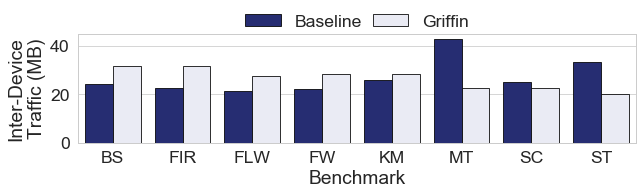

In [111]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=benchmark_data, 
            x='Benchmark', hue='Config', y='byte', 
            palette=['#1A237E', '#E8EAF6'], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.33), loc=9, ncol=2)
ax.set_ylabel('Inter-Device\nTraffic (MB)')

plt.savefig('traffic_total_amount.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [112]:
total_gpu1_data = filtered_data[filtered_data['src'].str.contains('GPU1') | filtered_data['dst'].str.contains('GPU1')]
total_gpu1_data.loc[:, 'Direction'] = 'in'
total_gpu1_data.loc[filtered_data['src'].str.contains('GPU1'), 'Direction']= 'out'
total_gpu1_data

C:\Users\yifan\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\yifan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Benchmark    Config      byte        dst    req        src Direction
2          bs  Baseline   9310208   GPU1.PMC  36368    CPU.PMC        in
10         bs  Baseline   2763980  GPU1.RDMA  63713  GPU2.RDMA        in
13         bs  Baseline   1683456  GPU1.RDMA  41600  GPU3.RDMA        in
16         bs  Baseline   1778420  GPU1.RDMA  43887  GPU4.RDMA        in
19         bs  Baseline   2842764  GPU2.RDMA  63713  GPU1.RDMA       out
20         bs  Baseline   1977344  GPU3.RDMA  41600  GPU1.RDMA       out
21         bs  Baseline   2083636  GPU4.RDMA  43887  GPU1.RDMA       out
29         bs  Baseline         0    CPU.PMC  36368   GPU1.PMC       out
44        fir  Baseline    973476  GPU1.RDMA  35555  GPU2.RDMA        in
48        fir  Baseline    419560  GPU1.RDMA  24606  GPU3.RDMA        in
61        fir  Baseline   2155364  GPU2.RDMA  35555  GPU1.RDMA       out
62        fir  Baseline   1745768  GPU3.RDMA  24606  GPU1.RDMA       out
63        fir  Baseline   2335720  GPU4.RDMA  44206  GPU1.RDMA       out
64        fir  Baseline         0    CPU.PMC  35232   GPU1.PMC       out
68        fir  Baseline   9018368   GPU1.PMC  35228    CPU.PMC        in
74        fir  Baseline   1554408  GPU1.RDMA  44206  GPU4.RDMA        in
84        flw  Baseline  10002432   GPU1.PMC  39072    CPU.PMC        in
90        flw  Baseline   1935612  GPU1.RDMA  55653  GPU2.RDMA        in
102       flw  Baseline    997844  GPU1.RDMA  31655  GPU3.RDMA        in
105       flw  Baseline    878940  GPU1.RDMA  29469  GPU4.RDMA        in
107       flw  Baseline         0    CPU.PMC  39072   GPU1.PMC       out
112       flw  Baseline   2961852  GPU2.RDMA  55653  GPU1.RDMA       out
113       flw  Baseline   1787796  GPU3.RDMA  31655  GPU1.RDMA       out
114       flw  Baseline   1714332  GPU4.RDMA  29469  GPU1.RDMA       out
123        fw  Baseline   1523064  GPU1.RDMA  39354  GPU2.RDMA        in
126        fw  Baseline         0    CPU.PMC  22992   GPU1.PMC       out
134        fw  Baseline    594784  GPU1.RDMA  13944  GPU4.RDMA        in
135        fw  Baseline   1932288  GPU2.RDMA  39088  GPU1.RDMA       out
136        fw  Baseline    692136  GPU3.RDMA  15454  GPU1.RDMA       out
137        fw  Baseline    645912  GPU4.RDMA  14146  GPU1.RDMA       out
..        ...       ...       ...        ...    ...        ...       ...
634        mt   Griffin     16192  GPU1.RDMA    448  GPU4.RDMA        in
636        mt   Griffin   2396160   GPU1.PMC   9360    CPU.PMC        in
645        mt   Griffin   1974260  GPU1.RDMA  35951   CPU.RDMA        in
649        mt   Griffin         0    CPU.PMC   9360   GPU1.PMC       out
658        mt   Griffin     43724  GPU1.RDMA    945  GPU2.RDMA        in
663        mt   Griffin     48192  GPU1.RDMA   1264  GPU3.RDMA        in
673        sc   Griffin   2355008  GPU1.RDMA  46640  GPU4.RDMA        in
676        sc   Griffin         0    CPU.PMC   1632   GPU1.PMC       out
677        sc   Griffin         0   GPU4.PMC     32   GPU1.PMC       out
678        sc   Griffin         0   GPU2.PMC     48   GPU1.PMC       out
686        sc   Griffin     39828   CPU.RDMA   3319  GPU1.RDMA       out
687        sc   Griffin   1590268  GPU2.RDMA  38245  GPU1.RDMA       out
688        sc   Griffin   1467488  GPU3.RDMA  33928  GPU1.RDMA       out
689        sc   Griffin   1749308  GPU4.RDMA  46645  GPU1.RDMA       out
693        sc   Griffin   1517796  GPU1.RDMA  33923  GPU3.RDMA        in
699        sc   Griffin   1775292  GPU1.RDMA  38245  GPU2.RDMA        in
702        sc   Griffin    252244  GPU1.RDMA   3319   CPU.RDMA        in
708        sc   Griffin      8192   GPU1.PMC     32   GPU4.PMC        in
711        sc   Griffin    417792   GPU1.PMC   1632    CPU.PMC        in
716        sc   Griffin     12288   GPU1.PMC     48   GPU2.PMC        in
721        st   Griffin     37352  GPU1.RDMA   3086  GPU4.RDMA        in
726        st   Griffin   3088384   GPU1.PMC  12064    CPU.PMC        in
740        st   Griffin         0    CPU.PMC  12064   GPU1.PMC

In [113]:
total_gpu1_plot_data = total_gpu1_data.groupby(['Benchmark', 'Config', 'Direction']).sum().reset_index()
total_gpu1_plot_data['byte'] /= 1e6
total_gpu1_plot_data['Benchmark'] = total_gpu1_plot_data['Benchmark'].str.upper()
total_gpu1_plot_data

Benchmark    Config Direction       byte     req
0         BS  Baseline        in  15.536064  185568
1         BS  Baseline       out   6.903744  185568
2         BS   Griffin        in   7.193524  115535
3         BS   Griffin       out   4.325620  115535
4        FIR  Baseline        in  11.965812  139595
5        FIR  Baseline       out   6.236852  139599
6        FIR   Griffin        in   7.807032  142943
7        FIR   Griffin       out   6.087224  142954
8        FLW  Baseline        in  13.814828  155849
9        FLW  Baseline       out   6.463980  155849
10       FLW   Griffin        in   6.217680  108620
11       FLW   Griffin       out   4.503040  108928
12        FW  Baseline        in   8.667668   91367
13        FW  Baseline       out   3.270336   91680
14        FW   Griffin        in   6.185236   92743
15        FW   Griffin       out   3.516372   92743
16        KM  Baseline        in  12.659724   50769
17        KM  Baseline       out   0.057420   50769
18        KM   Griffin        in  10.717808  130740
19        KM   Griffin       out   1.867888  130740
20        MT  Baseline        in  31.749044  203999
21        MT  Baseline       out   3.355884  200457
22        MT   Griffin        in   4.478528   47968
23        MT   Griffin       out   1.315136   47968
24        SC  Baseline        in   4.734820  263379
25        SC  Baseline       out  19.506220  263369
26        SC   Griffin        in   6.338612  123839
27        SC   Griffin       out   4.846892  123849
28        ST  Baseline        in  25.126528  138864
29        ST  Baseline       out   3.120424  138862
30        ST   Griffin        in   4.552068   35579
31        ST   Griffin       out   0.605636   35579

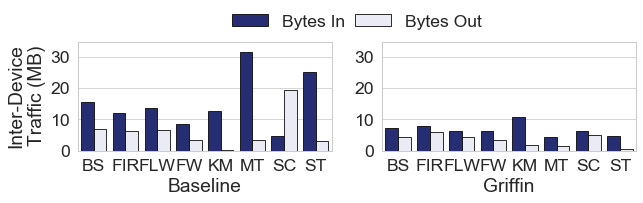

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))

sns.barplot(data=total_gpu1_plot_data[total_gpu1_plot_data['Config']=='Baseline'], 
            x='Benchmark', hue='Direction', y='byte', 
            palette=['#1A237E', '#E8EAF6'], ec='k',
            ax=ax1)
sns.barplot(data=total_gpu1_plot_data[total_gpu1_plot_data['Config']=='Griffin'], 
            x='Benchmark', hue='Direction', y='byte', 
            palette=['#1A237E', '#E8EAF6'], ec='k',
            ax=ax2)


handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Bytes In', 'Bytes Out'], 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(1.1, 1.4), loc=9, ncol=2)
ax1.set_ylabel('Inter-Device\nTraffic (MB)')
ax1.set_yticks([0, 10, 20, 30])
ax1.set_ylim([0, 35])
ax1.set_xlabel('Baseline')


ax2.set_ylabel('')
ax2.get_legend().remove()
ax2.set_yticks([0, 10, 20, 30])
ax2.set_ylim([0, 35])
ax2.set_xlabel('Griffin')

plt.savefig('traffic_gpu1.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [115]:
norm_gpu1_plot_data = total_gpu1_data.drop(columns=['req']).groupby(['Benchmark', 'Config', 'Direction']).sum()
norm_gpu1_plot_data = norm_gpu1_plot_data.unstack('Config').reset_index()
norm_gpu1_plot_data.columns=['Benchmark', 'Direction', 'Baseline', 'Griffin']
norm_gpu1_plot_data['Griffin'] /= norm_gpu1_plot_data['Baseline']
norm_gpu1_plot_data['Benchmark'] = norm_gpu1_plot_data['Benchmark'].str.upper()
norm_gpu1_plot_data

Benchmark Direction  Baseline    Griffin
0         BS        in  15536064   0.463021
1         BS       out   6903744   0.626561
2        FIR        in  11965812   0.652445
3        FIR       out   6236852   0.976009
4        FLW        in  13814828   0.450073
5        FLW       out   6463980   0.696636
6         FW        in   8667668   0.713599
7         FW       out   3270336   1.075233
8         KM        in  12659724   0.846607
9         KM       out     57420  32.530268
10        MT        in  31749044   0.141060
11        MT       out   3355884   0.391890
12        SC        in   4734820   1.338723
13        SC       out  19506220   0.248479
14        ST        in  25126528   0.181166
15        ST       out   3120424   0.194088

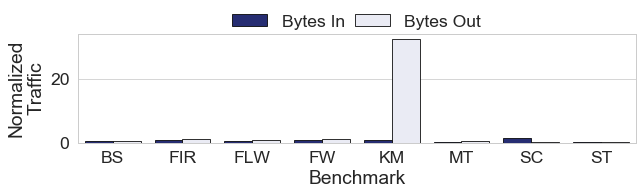

In [116]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=norm_gpu1_plot_data, 
            x='Benchmark', hue='Direction', y='Griffin', 
            palette=['#1A237E', '#E8EAF6'], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,  ['Bytes In', 'Bytes Out'], 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.33), loc=9, ncol=2)
ax.set_ylabel('Normalized\nTraffic')

plt.savefig('traffic_total_amount_gpu1.pdf', bbox_inches='tight')
plt.show()
plt.close()